In [37]:
import pandas as pd

In [38]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\placement.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [39]:
x = dataset[["package"]]
y = dataset["package"]

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.model_selection import cross_val_score

In [46]:
# model accurecy
cross_val_score(LinearRegression(),x,y,cv=5)*100

array([100., 100., 100., 100., 100.])

In [47]:
score = cross_val_score(LinearRegression(),x,y,cv=5)*100
score.sort()      # Minimum  to Maximum 
score

array([100., 100., 100., 100., 100.])

In [48]:
new_data = dataset.head(10)
new_data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [61]:
# creating new dataset with small datas

In [49]:
x_new = new_data[["package"]]
y_new = new_data["package"]

In [50]:
from sklearn.model_selection import LeaveOneOut, LeavePOut, KFold, StratifiedKFold

# KFold Method

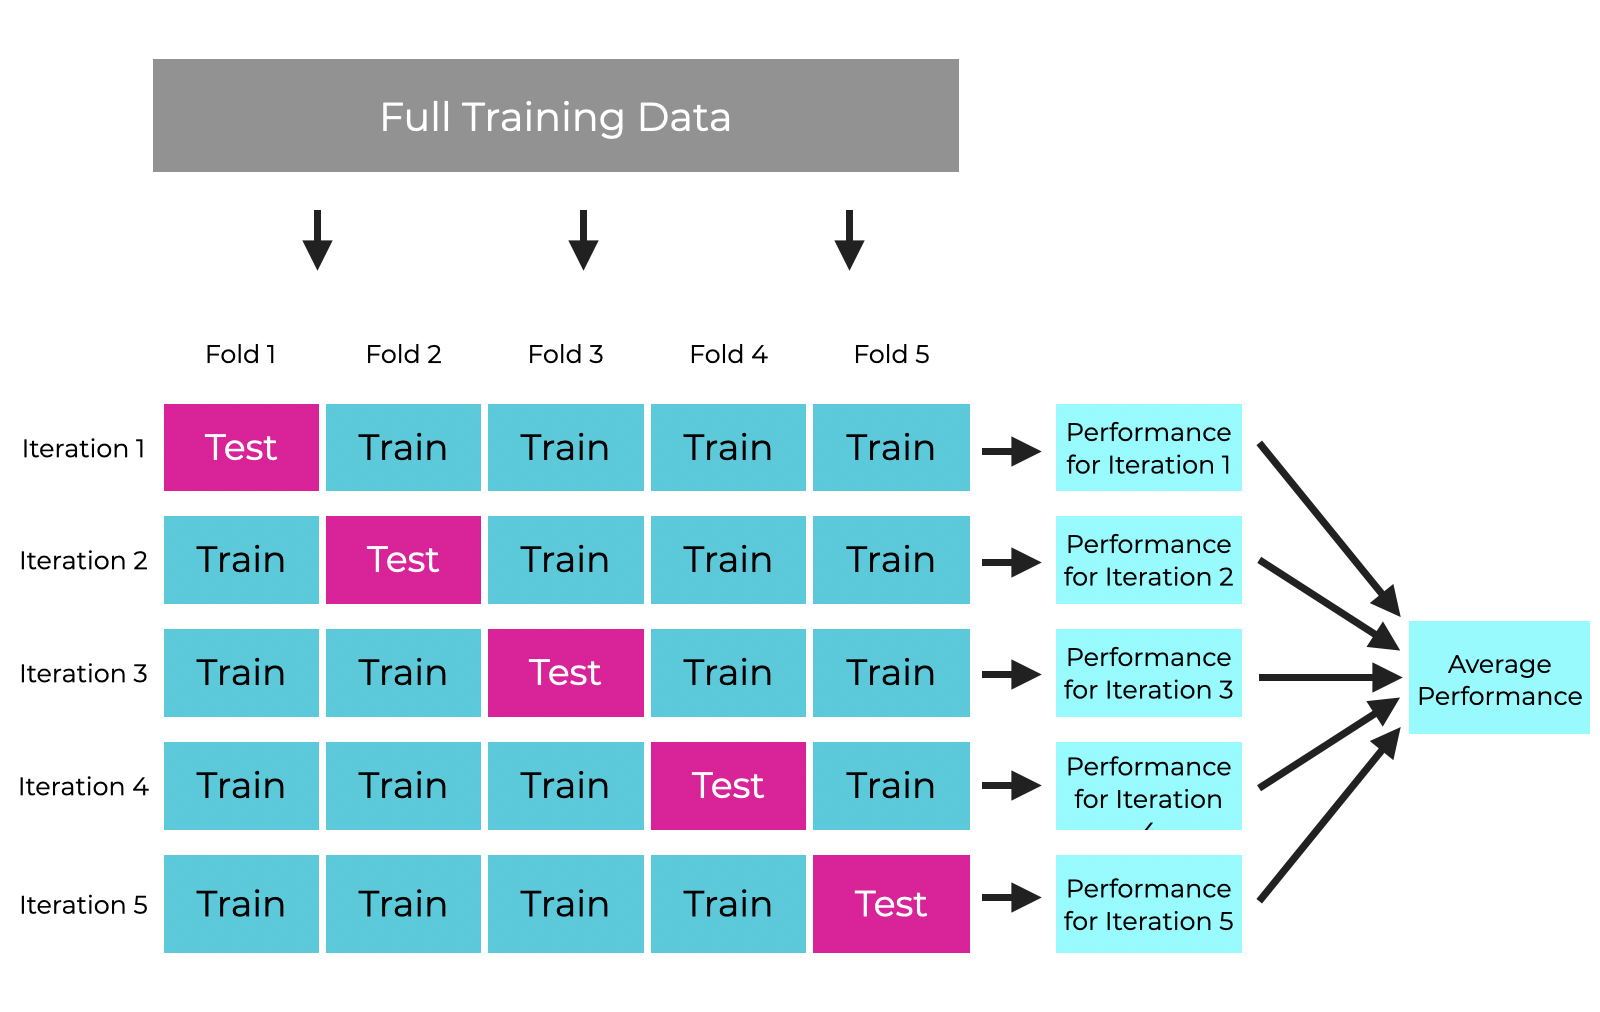

In [28]:
kf = KFold(n_splits=5)                      # n_split=5 means cut into 5 parts
for train,test in kf.split(x_new,y_new):
    print(train,test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [58]:
score = cross_val_score(LinearRegression(),x,y,cv=kf)*100
score.sort()      # Minimum  to Maximum 
score

array([100., 100., 100., 100., 100.])

# LeaveOneOut Method

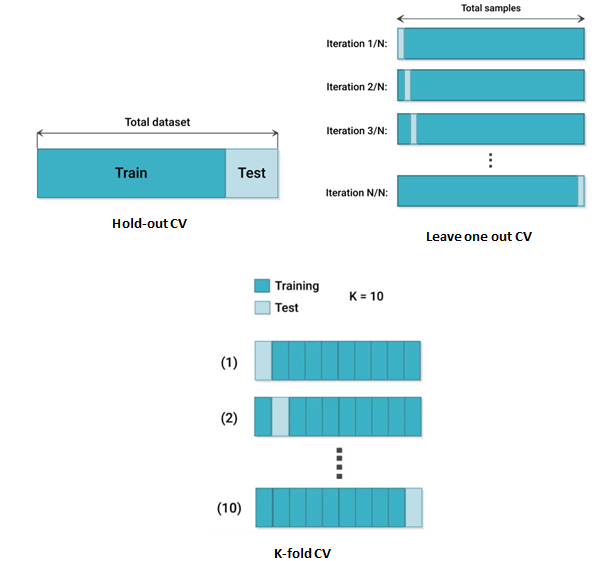|

In [52]:
lo = LeaveOneOut()
for train,test in lo.split(x_new,y_new):
    print(train,test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [56]:
score = cross_val_score(LinearRegression(),x,y,cv=lo)*100
score.sort()      # Minimum  to Maximum 

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-pac

In [57]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# LeavePOut Method

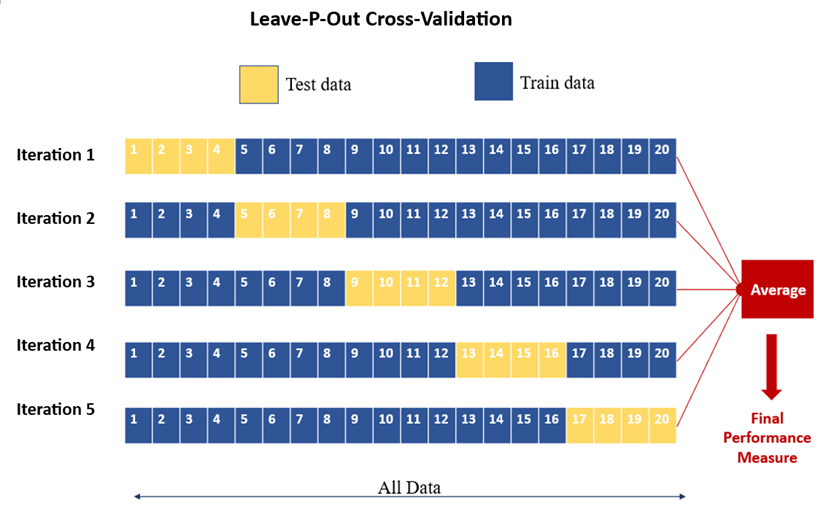

In [26]:
lp = LeavePOut(p=2)                        # p=2 mean 2 pair
for train,test in lp.split(x_new,y_new):
    print(train,test)

[2 3 4 5 6 7 8 9] [0 1]
[1 3 4 5 6 7 8 9] [0 2]
[1 2 4 5 6 7 8 9] [0 3]
[1 2 3 5 6 7 8 9] [0 4]
[1 2 3 4 6 7 8 9] [0 5]
[1 2 3 4 5 7 8 9] [0 6]
[1 2 3 4 5 6 8 9] [0 7]
[1 2 3 4 5 6 7 9] [0 8]
[1 2 3 4 5 6 7 8] [0 9]
[0 3 4 5 6 7 8 9] [1 2]
[0 2 4 5 6 7 8 9] [1 3]
[0 2 3 5 6 7 8 9] [1 4]
[0 2 3 4 6 7 8 9] [1 5]
[0 2 3 4 5 7 8 9] [1 6]
[0 2 3 4 5 6 8 9] [1 7]
[0 2 3 4 5 6 7 9] [1 8]
[0 2 3 4 5 6 7 8] [1 9]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 3 5 6 7 8 9] [2 4]
[0 1 3 4 6 7 8 9] [2 5]
[0 1 3 4 5 7 8 9] [2 6]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 4 6 7 8 9] [3 5]
[0 1 2 4 5 7 8 9] [3 6]
[0 1 2 4 5 6 8 9] [3 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 5 7 8 9] [4 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 3 5 6 7 9] [4 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 3 4 7 8 9] [5 6]
[0 1 2 3 4 6 8 9] [5 7]
[0 1 2 3 4 6 7 9] [5 8]
[0 1 2 3 4 6 7 8] [5 9]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 7 9] [6 8]
[0 1 2 3 4 5 7 8

In [59]:
score = cross_val_score(LinearRegression(),x,y,cv=lp)*100
score.sort()      # Minimum  to Maximum 
score

array([100., 100., 100., 100., 100.])

# StratifiedKFold Method

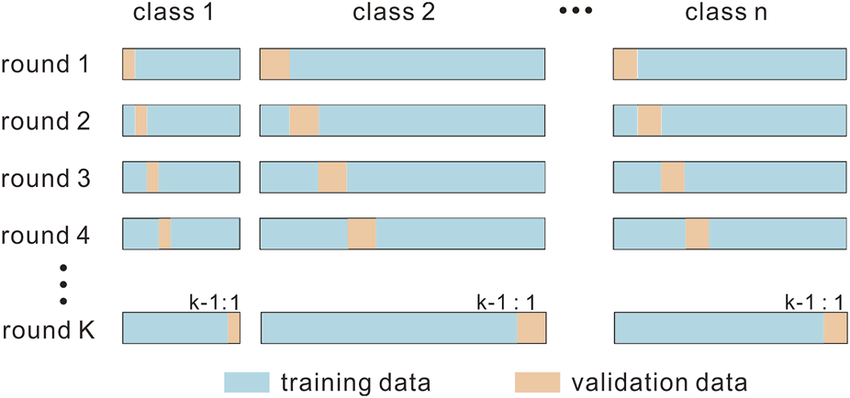

In [60]:
# StratifiedKFold Work For Classifiaction only

'''
sk = StratifiedKFold(n_splits=5)                      # n_split=5 means cut into 5 parts
for train,test in sk.split(x_new,y_new):
    print(train,test)  
    
    
score = cross_val_score(LinearRegression(),x,y,cv=sk)*100
score.sort()      # Minimum  to Maximum 
score     '''

'\nsk = StratifiedKFold(n_splits=5)                      # n_split=5 means cut into 5 parts\nfor train,test in sk.split(x_new,y_new):\n    print(train,test)  \n    \n    \nscore = cross_val_score(LinearRegression(),x,y,cv=sk)*100\nscore.sort()      # Minimum  to Maximum \nscore     '